In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
#Funcion that loads graph from file
def inputGraph(filePath):
    graph = nx.read_graphml(filePath)
    return graph

In [79]:
class ACO:
    def __init__(self, graph, nodes_info, adjacency_info, ants, alpha, beta, rho, q, iterations):
        self.nodes_info = nodes_info
        self.graph = graph
        self.adjacency_info = adjacency_info
        self.ants = ants
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q = q
        self.iterations = iterations
        self.pheromone = {(u, v): 0.1 for u, v in self.graph.edges()}  # Initialize pheromone levels for each edge
        self.best_path = None
        self.best_path_length = float('-inf')

    def run(self):
        for i in range(self.iterations):
            paths = self.generate_paths()
            self.update_pheromone(paths)
            self.update_best_path(paths)
        return self.best_path

    def generate_paths(self):
        paths = []
        for _ in range(self.ants):
            start_node = random.choice([node for node, _ in self.nodes_info])
            path = [start_node]
            visited = set([start_node])
            while len(path) < len(self.graph.nodes()):
                next_node = self.choose_next_node(path)
                if next_node is None:
                    break
                path.append(next_node)
                visited.add(next_node)
            if len(path) == len(self.graph.nodes()):
                paths.append(path)
        return paths
        
    def choose_next_node(self, path):
        
        visited_nodes = set(path)
        print("Visited nodes:")
        print(visited_nodes)
        
        current_node = path[-1]
        print("Current node:")
        print(current_node)
        
        available_nodes = [node for node in self.graph.neighbors(current_node) if node not in path]
        print("Available nodes:")
        print(available_nodes)
        if not available_nodes:
            return None
        next_node = random.choice(available_nodes)
        print(next_node)
        return next_node

    def calculate_probability(self, current_node, next_node):
        pheromone = self.pheromone.get((current_node, next_node), 0.1)  # Default to a small pheromone level if no edge exists
        distance = 1 / self.graph[current_node][next_node]['weight']  # Inverse of edge length
        probability = pheromone ** self.alpha * distance ** self.beta
        return probability

    def update_pheromone(self, paths):
        for path in paths:
            path_length = sum(1 / self.graph[path[i]][path[i+1]]['weight'] for i in range(len(path) - 1))
            for i in range(len(path) - 1):
                self.pheromone[(path[i], path[i+1])] += self.q / path_length
                self.pheromone[(path[i], path[i+1])] *= (1 - self.rho)

    def update_best_path(self, path):
        new_path_length = sum(self.graph[path[i]][path[i+1]]['weight'] for i in range(len(path) - 1))
        if new_path_length < self.best_path_length:
            self.best_path_length = new_path_length
            self.best_path = path

    def plot_graph(self):
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True)
        plt.show()
        nx.draw_networkx_edges(self.graph, pos, edgelist=self.best_path, edge_color='r')
        plt.show()

Visited nodes:
{'1'}
Current node:
1
Available nodes:
['9', '25']
9
Visited nodes:
{'9', '1'}
Current node:
9
Available nodes:
['11']
11
Visited nodes:
{'9', '1', '11'}
Current node:
11
Available nodes:
['5', '6', '22', '23', '27']
5
Visited nodes:
{'5', '9', '1', '11'}
Current node:
5
Available nodes:
['13', '15', '16', '27', '28']
13
Visited nodes:
{'5', '9', '11', '1', '13'}
Current node:
13
Available nodes:
['20']
20
Visited nodes:
{'5', '9', '11', '1', '20', '13'}
Current node:
20
Available nodes:
['3', '12', '27']
12
Visited nodes:
{'5', '9', '11', '12', '1', '20', '13'}
Current node:
12
Available nodes:
['24']
24
Visited nodes:
{'5', '9', '11', '24', '12', '1', '20', '13'}
Current node:
24
Available nodes:
['10']
10
Visited nodes:
{'5', '9', '11', '24', '12', '1', '20', '10', '13'}
Current node:
10
Available nodes:
[]
Visited nodes:
{'3'}
Current node:
3
Available nodes:
['20', '23', '25', '26']
20
Visited nodes:
{'3', '20'}
Current node:
20
Available nodes:
['12', '13', '27']
2

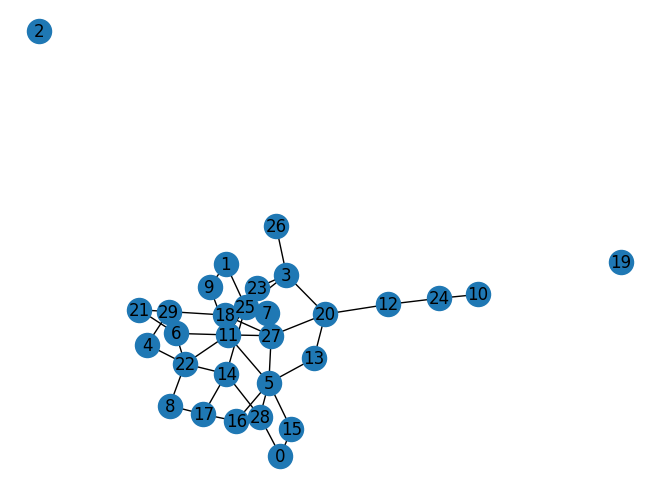

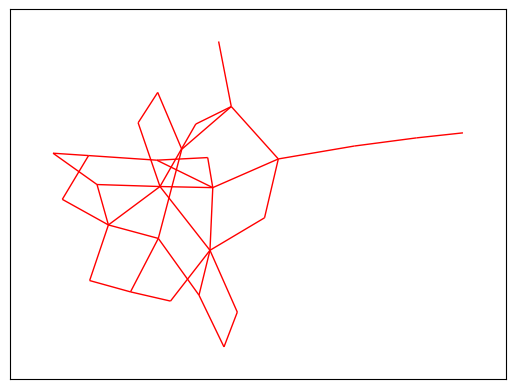

None


In [80]:
graph = inputGraph('test1.graphml')
nodes_info = list(graph.nodes(data=True))
adjacency_info = list(graph.adjacency())
#print(adjacency_info)
ants = 10
alpha = 1
beta = 5
rho = 0.1
q = 1
iterations = 1
aco = ACO(graph, nodes_info, adjacency_info, ants, alpha, beta, rho, q, iterations)
best_path = aco.run()
plot_graph = aco.plot_graph()
print(best_path)